In [1]:
! pip install NetworkX

In [2]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt 
import matplotlib.colors as mcolors
import itertools as it
import networkx as nx
from math import *
import matplotlib.pylab as plt

df = pd.read_csv("https://raw.githubusercontent.com/s1102498/Global_Energy_Analysis/main/bitcoinalpha.csv")
df["DISTANCE"] = (df["RATING"] - df["RATING"].min()) / (df["RATING"].max() - df["RATING"].min())

#SOURCE = COMPRATORE
#TARGET = VENDITORE
#RATING = GRADO DI AFFIDABILITA'

In [3]:
def draw_graph ( graph, min_weight = 0, pos = None, show = True): 
  plt.figure(figsize=( 13 , 10 ))
  nx.draw(graph,pos, with_labels= False ,node_size=10)
  if show:
    plt.show()
  return

def draw(G, pos, measures, measure_name):
  if not pos:
    pos = nx.kamada_kawai_layout(G)
    
  nodes = nx.draw_networkx_nodes(G, pos, node_size=80, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  
  edges = nx.draw_networkx_edges(G, pos)

  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

def draw_circle_around_clique(clique,coords):
  dist=0
  temp_dist=0
  center=[0 for i in range(2)]
  color=next(colors)
  for a in clique:
    for b in clique:
      temp_dist=(coords[a][0]-coords[b][0])**2+(coords[a][1]-coords[b][1])**2
      if temp_dist>dist:
        dist=temp_dist
        for i in range(2):
          center[i]=(coords[a][i]+coords[b][i])/2
  rad=dist**0.5/2
  cir = plt.Circle((center[0],center[1]),   radius=rad*1.3,fill=False,color=color,hatch=next(hatches))
  plt.gca().add_patch(cir)
  plt.axis('scaled')
  # return color of the circle, to use it as the color for vertices of the cliques
  return color

# ANALYSIS OF GRAPH NOT DIRECTED

In [75]:
G = nx.from_pandas_edgelist(df,'SOURCE', 'TARGET','DISTANCE')

In [6]:
print(nx.is_connected(G))
to_be_removed = [n for n in G.nodes if G.degree(n) <= 1]
for n in range(0,len(to_be_removed)):
  G.remove_node(to_be_removed[n])
print(nx.is_connected(G))


False
True


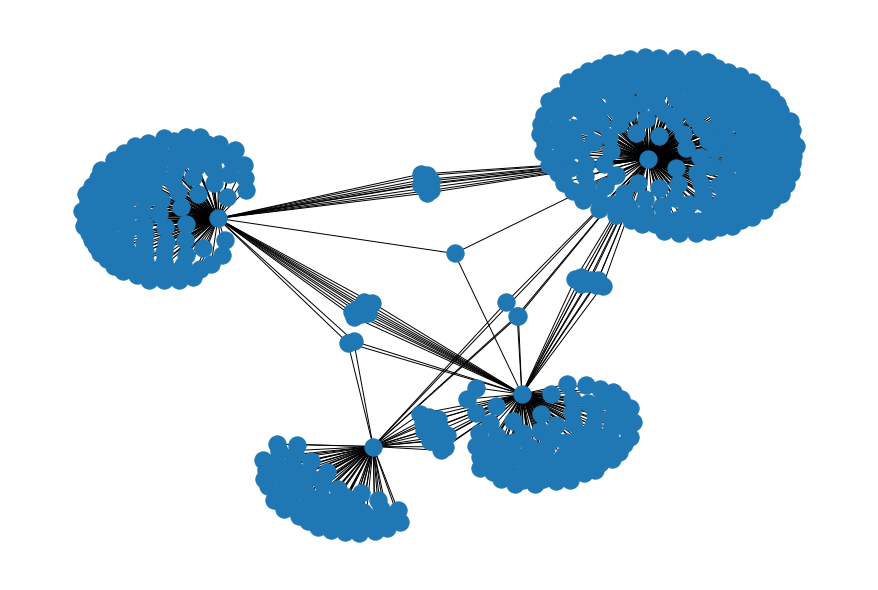

In [74]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()


In [ ]:
print("Nodes: ", len(G.nodes))
print("Edges: ", len(G.edges))
print("Radius: ", nx.radius(G))
print("Diameter: ", nx.diameter(G))
print("Center: ", nx.center(G))
print("Density : ", nx.density(G))
print("Periphery': ", len(nx.periphery(G)))
coeff = sum(nx.clustering(G).values())
nodes = G.nodes
print("Coeff Cluster mean : ", coeff/len(nodes))

Nodes:  2415
Edges:  12760
Radius:  4
Diameter:  8
Center:  [1, 2, 40, 31, 8, 25]
Density :  0.004377501153553889
Periphery':  6
Coeff Cluster mean :  0.2869594850525068


## DEGREE
The following istogram contains information about how many **edges** for each **node**.

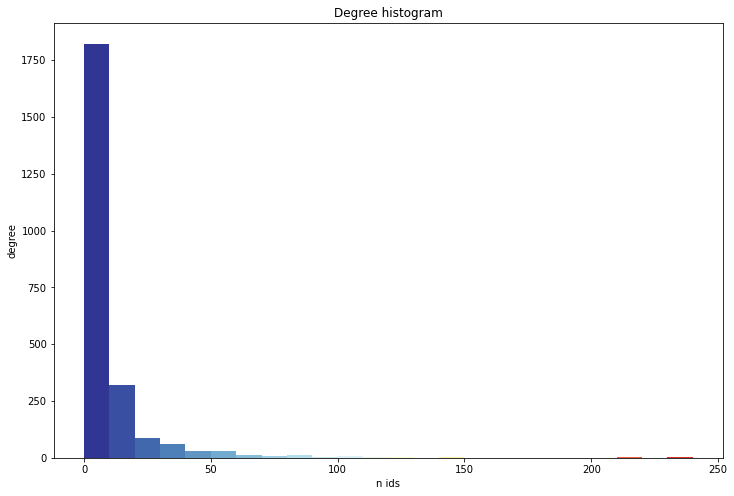

In [ ]:
import numpy as np

plt.figure(figsize=(12,8))
bin = np.arange(0,250,10)
cm = plt.cm.get_cmap('RdYlBu_r')
n, bins, patches = plt.hist([v for _, v in nx.degree(G)], bin)
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.title("Degree histogram")
plt.xlabel("n ids")
plt.ylabel("degree")
plt.show()


# TRIADES

In [ ]:
"""
from itertools import combinations

triad_class = {}
for nodes in combinations(G.nodes, 3):
    n_edges = G.subgraph(nodes).number_of_edges()
    triad_class.setdefault(n_edges, []).append(nodes)

print("Number of triade : ", len(triad_class[0] + triad_class[2] + triad_class[3]))
"""

'\nfrom itertools import combinations\n\ntriad_class = {}\nfor nodes in combinations(G.nodes, 3):\n    n_edges = G.subgraph(nodes).number_of_edges()\n    triad_class.setdefault(n_edges, []).append(nodes)\n\nprint("Number of triade : ", len(triad_class[0] + triad_class[2] + triad_class[3]))\n'

# DEGREE CENTRALITY
Il Grado di centralità di un nodo è il numero di nodi a cui è connesso.

In [7]:
degree = nx.degree_centrality(G) # The degree centrality for a node v is the fraction of nodes it is connected to.
pos = nx.spiral_layout(G)
#plt.figure(figsize=(20,12))
#draw(G, pos, degree, 'DEGREE CENTRALITY')

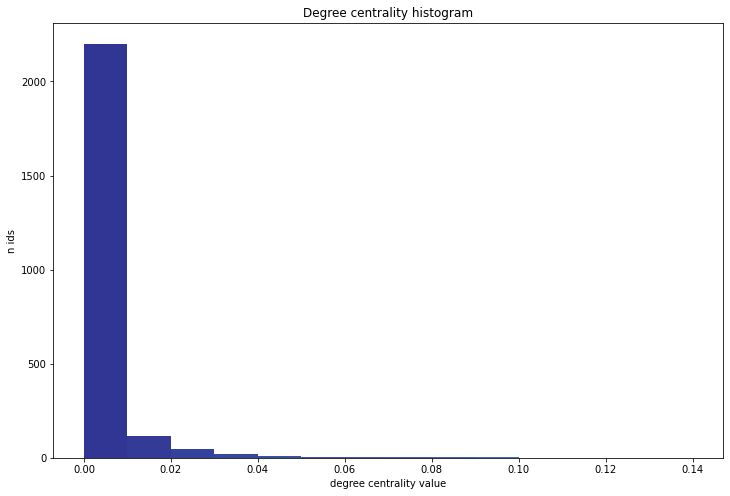

In [ ]:
plt.figure(figsize=(12,8))
bin = np.arange(0,0.15,0.01)
cm = plt.cm.get_cmap('RdYlBu_r')
n, bins, patches = plt.hist(sorted(degree.values()), bins=bin)
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.title("Degree centrality histogram")
plt.xlabel("degree centrality value")
plt.ylabel("n ids")
plt.show()

In [8]:
num_nodes_considered = 100
num_nodes_plot = 10

ten_c1 = []
ten_value = []
dict_sort = sorted(degree.items(),key= lambda item: item[1], reverse=True)
print("Top ten ID-User more active on the site :")
for i in range(0, num_nodes_considered):
  print(f"ID :  {dict_sort[i][0]}      VALUES DEGREE : {dict_sort[i][1]}")
  ten_c1.append(dict_sort[i][0])
  ten_value.append(dict_sort[i][1])

Top ten ID-User more active on the site :
ID :  1      VALUES DEGREE : 0.14623032311516154
ID :  8      VALUES DEGREE : 0.10273405136702568
ID :  3      VALUES DEGREE : 0.09734879867439933
ID :  11      VALUES DEGREE : 0.09610604805302402
ID :  2      VALUES DEGREE : 0.09527754763877382
ID :  7      VALUES DEGREE : 0.08989229494614746
ID :  177      VALUES DEGREE : 0.08906379453189726
ID :  4      VALUES DEGREE : 0.08367854183927091
ID :  15      VALUES DEGREE : 0.08036454018227009
ID :  5      VALUES DEGREE : 0.07456503728251863
ID :  10      VALUES DEGREE : 0.0704225352112676
ID :  26      VALUES DEGREE : 0.06752278376139188
ID :  9      VALUES DEGREE : 0.06420878210439104
ID :  22      VALUES DEGREE : 0.06089478044739022
ID :  6      VALUES DEGREE : 0.06048053024026512
ID :  33      VALUES DEGREE : 0.05550952775476387
ID :  95      VALUES DEGREE : 0.052609776304888146
ID :  12      VALUES DEGREE : 0.05178127589063794
ID :  58      VALUES DEGREE : 0.05136702568351284
ID :  30      VA

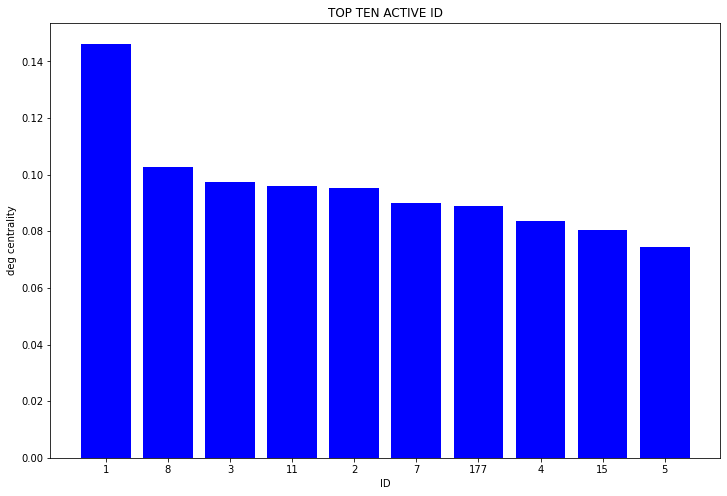

In [ ]:
plt.figure(figsize=(12,8))
plt.title("TOP TEN ACTIVE ID")
plt.xlabel("ID")
plt.ylabel("deg centrality")
plt.bar(list(map(str,ten_c1[:num_nodes_plot])), ten_value[:num_nodes_plot], color= 'Blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  from ipykernel import kernelapp as app


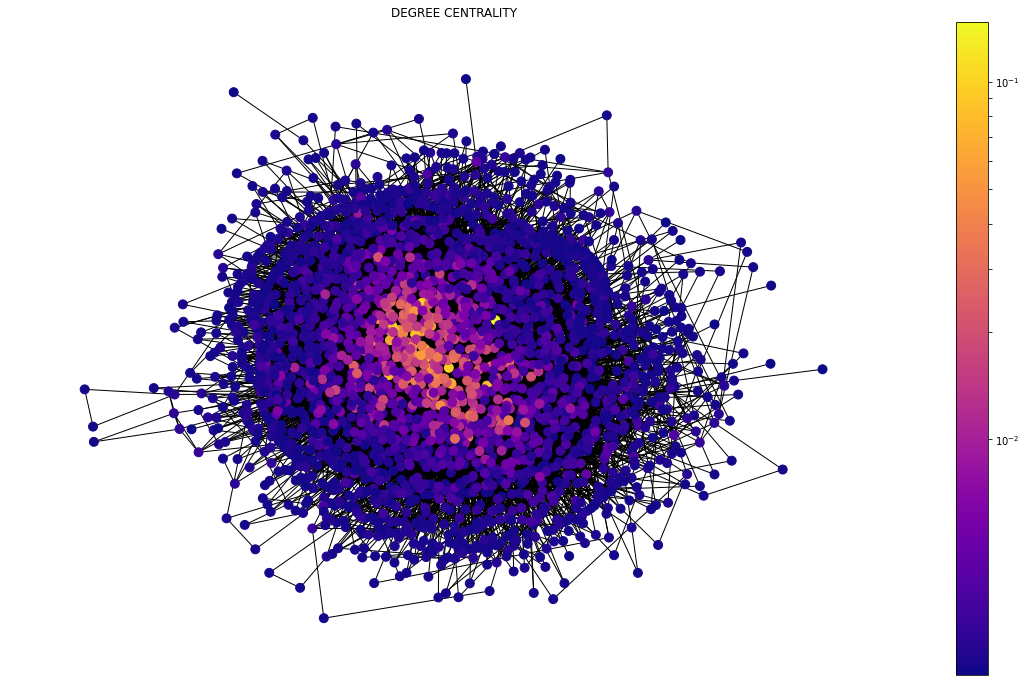

In [ ]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(20,12))
draw(G, pos, degree, 'DEGREE CENTRALITY')

# EIGENVECTOR CENTRALITY
E' un'stensione di base della centralità del grado che definisce la centralità di un nodo come proporzionale all'importanza dei suoi vicini, tenendo conto anche dell'affidabilità (peso dell'arco).

In [9]:
eig = nx.eigenvector_centrality(G)
#pos = nx.kamada_kawai_layout(G)
#plt.figure(figsize=(20,12))
#draw(G, pos, eig, "EIGNVECTOR CENTRALITY")

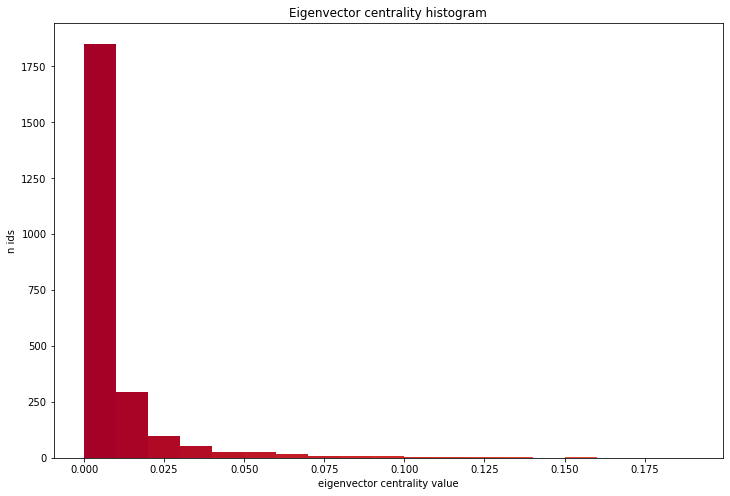

In [ ]:
import numpy as np
plt.figure(figsize=(12,8))
bin = np.arange(0,0.2,0.01)
cm = plt.cm.get_cmap('RdYlGn')
n, bins, patches = plt.hist(sorted(eig.values()), bins=bin)
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.title("Eigenvector centrality histogram")
plt.xlabel("eigenvector centrality value")
plt.ylabel("n ids")
plt.show()

In [10]:
ten_c2 = []
ten_value = []
dict_sort = sorted(eig.items(),key= lambda item: item[1], reverse=True)
print("Top ten ID-User more active on the site (eig_centrality) :")
for i in range(0,num_nodes_considered):
  print(f"ID :  {dict_sort[i][0]}      VALUES DEGREE : {dict_sort[i][1]}")
  ten_c2.append(dict_sort[i][0])
  ten_value.append(dict_sort[i][1])


Top ten ID-User more active on the site (eig_centrality) :
ID :  11      VALUES DEGREE : 0.19400390859037636
ID :  2      VALUES DEGREE : 0.17434602143673708
ID :  177      VALUES DEGREE : 0.16646236491036567
ID :  3      VALUES DEGREE : 0.15772109395097253
ID :  7      VALUES DEGREE : 0.1547860112767094
ID :  8      VALUES DEGREE : 0.15016224046829676
ID :  26      VALUES DEGREE : 0.14835085114080074
ID :  95      VALUES DEGREE : 0.13138842433935727
ID :  24      VALUES DEGREE : 0.1304159820791183
ID :  22      VALUES DEGREE : 0.12989914056973043
ID :  10      VALUES DEGREE : 0.1273660335650261
ID :  1      VALUES DEGREE : 0.1265028336856427
ID :  9      VALUES DEGREE : 0.1249708509691729
ID :  5      VALUES DEGREE : 0.12042841934221403
ID :  30      VALUES DEGREE : 0.11736642652737862
ID :  6      VALUES DEGREE : 0.11651004932916639
ID :  15      VALUES DEGREE : 0.1159100238659116
ID :  58      VALUES DEGREE : 0.11381482274123672
ID :  19      VALUES DEGREE : 0.11033976581726027
ID :

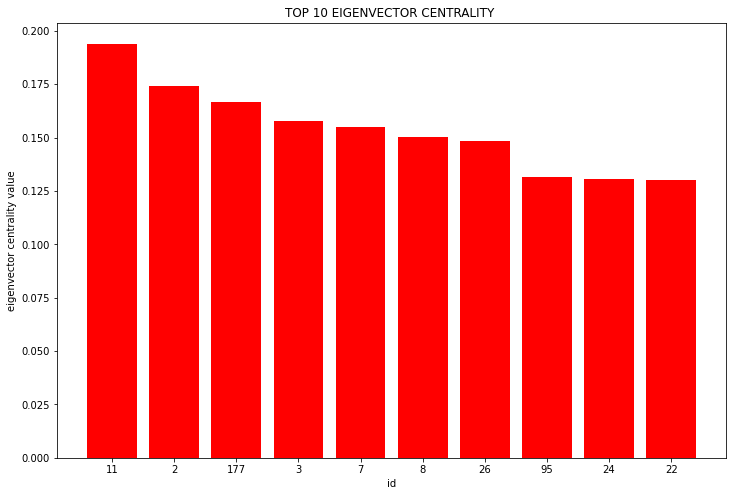

In [ ]:
plt.figure(figsize=(12,8))
plt.title("TOP 10 EIGENVECTOR CENTRALITY ")
plt.ylabel("eigenvector centrality value")
plt.xlabel("id")
plt.bar(list(map(str,ten_c2[:num_nodes_plot])), ten_value[:num_nodes_plot], color= 'Red')
plt.show()

# CLOSENESS CENTRALITY
E' una misura in cui l'importanza di ciascun nodo è determinata dalla vicinanza a tutti gli altri nodi. Nel caso di un grafo non pesato tutti gli archi hanno costi pari a 1 per calcolare lo shortesh path tra due nodi.

Viene calcolata senza pesare gli archi, considerando che

In [11]:
closeness = nx.closeness_centrality(G)
#pos = 
#draw(G, pos, closeness, "CLOSENESS CENTRALITY")

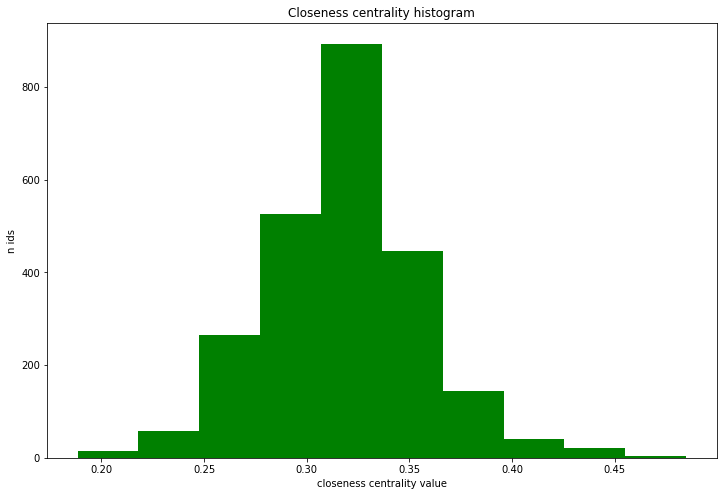

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(list(closeness.values()), color = 'green')
plt.title("Closeness centrality histogram")
plt.xlabel("closeness centrality value")
plt.ylabel("n ids")
plt.show()

In [12]:
ten_c3 = []
ten_value = []
dict_sort = sorted(closeness.items(),key= lambda item: item[1], reverse=True)
print("Top ten ID-User more active on the site (closeness_centrality) :")
for i in range(0,num_nodes_considered):
  print(f"ID :  {dict_sort[i][0]}      VALUES DEGREE : {dict_sort[i][1]}")
  ten_c3.append(dict_sort[i][0])
  ten_value.append(dict_sort[i][1])

Top ten ID-User more active on the site (closeness_centrality) :
ID :  2      VALUES DEGREE : 0.4847389558232932
ID :  11      VALUES DEGREE : 0.47585255273013993
ID :  1      VALUES DEGREE : 0.4571103957583791
ID :  10      VALUES DEGREE : 0.45461393596986815
ID :  22      VALUES DEGREE : 0.4487823015430377
ID :  4      VALUES DEGREE : 0.44326110907087773
ID :  26      VALUES DEGREE : 0.4422865518504947
ID :  8      VALUES DEGREE : 0.441800878477306
ID :  177      VALUES DEGREE : 0.44163922429564584
ID :  9      VALUES DEGREE : 0.44002916514764856
ID :  95      VALUES DEGREE : 0.43986880466472306
ID :  15      VALUES DEGREE : 0.4381125226860254
ID :  33      VALUES DEGREE : 0.4363702096890817
ID :  3      VALUES DEGREE : 0.43574007220216604
ID :  24      VALUES DEGREE : 0.43487659881102503
ID :  7      VALUES DEGREE : 0.43440705416591685
ID :  42      VALUES DEGREE : 0.43107142857142855
ID :  30      VALUES DEGREE : 0.4303030303030303
ID :  7603      VALUES DEGREE : 0.4294609500088952

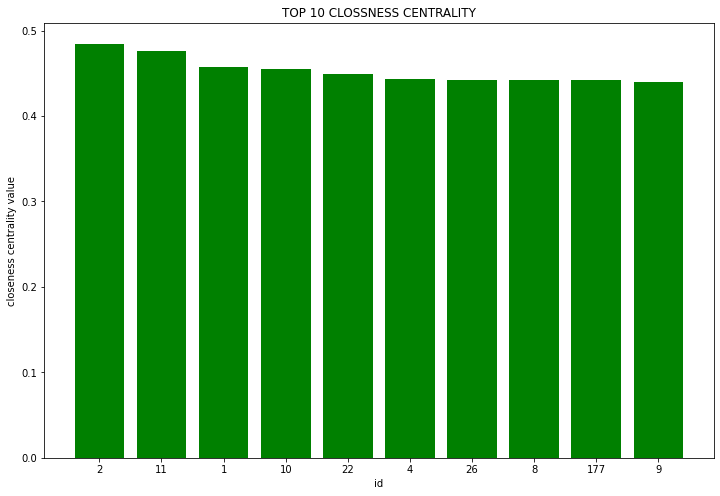

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(list(map(str,ten_c3[:num_nodes_plot])), ten_value[:num_nodes_plot], color= 'Green')
plt.title("TOP 10 CLOSSNESS CENTRALITY")
plt.xlabel("id")
plt.ylabel("closeness centrality value")
plt.show()

# BETWEENNESS CENTRALITY
E' una misura che si basa sul percorso più breve tra i nodi, è determinata come il numero dei percorsi più brevi che passano per un nodo dato.

In [13]:
betw = nx.betweenness_centrality(G)
#draw(G,pos,betw, "BETWEENNESS CENTRALITY")

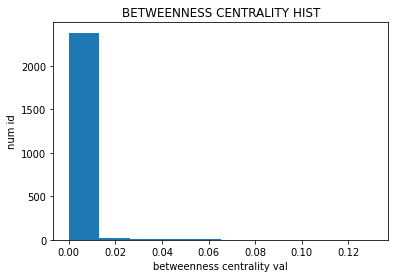

In [ ]:
plt.hist(list(betw.values()))
plt.title("BETWEENNESS CENTRALITY HIST")
plt.xlabel("betweenness centrality val")
plt.ylabel("num id")
plt.show()

In [14]:
ten_c4 = []
ten_value = []
dict_sort = sorted(betw.items(),key= lambda item: item[1], reverse=True)
print("Top ten ID-User more active on the site (betweenness_centrality) :")
for i in range(0,num_nodes_considered):
  print(f"ID :  {dict_sort[i][0]}      VALUES DEGREE : {dict_sort[i][1]}")
  ten_c4.append(dict_sort[i][0])
  ten_value.append(dict_sort[i][1])

Top ten ID-User more active on the site (betweenness_centrality) :
ID :  1      VALUES DEGREE : 0.13056788013723072
ID :  2      VALUES DEGREE : 0.0735421914220333
ID :  8      VALUES DEGREE : 0.0628731464679816
ID :  11      VALUES DEGREE : 0.059955479036039594
ID :  4      VALUES DEGREE : 0.05898039409788692
ID :  15      VALUES DEGREE : 0.057522417748383244
ID :  3      VALUES DEGREE : 0.047620123162493706
ID :  10      VALUES DEGREE : 0.04120048502248171
ID :  7      VALUES DEGREE : 0.04008055478294971
ID :  5      VALUES DEGREE : 0.03992182063288039
ID :  177      VALUES DEGREE : 0.038520348122536144
ID :  13      VALUES DEGREE : 0.03345089045215024
ID :  22      VALUES DEGREE : 0.0289597841888687
ID :  9      VALUES DEGREE : 0.027395816835777385
ID :  26      VALUES DEGREE : 0.025389523401226827
ID :  33      VALUES DEGREE : 0.02497189981235369
ID :  6      VALUES DEGREE : 0.02483460759757042
ID :  7564      VALUES DEGREE : 0.023351698837750363
ID :  16      VALUES DEGREE : 0.020

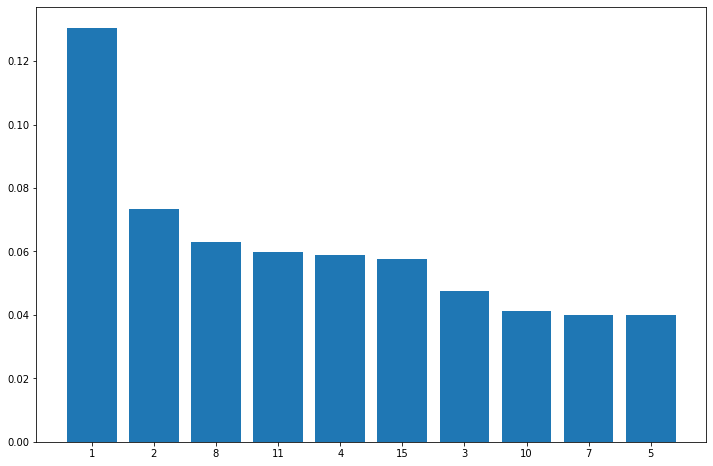

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(list(map(str,ten_c4[:num_nodes_plot])), ten_value[:num_nodes_plot])
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
art_points = nx.articulation_points(G)
bc_w = nx.betweenness_centrality(G)
art_bcw={}
for art_point in art_points:
  art_bcw.update({ art_point : bc_w[art_point]})
  sorted_art_bcw = sorted (art_bcw.items(), key= lambda item: item[ 1 ],  reverse= True )

print ( '\033[1m' + 'Articulation Points sorted by Betweenness Centrality (Weight):\n' + '\033[0m' )
for i,e in enumerate (sorted_art_bcw):
  print ( str (i+ 1 )+ '. ' + str (e[ 0 ])+ ': ' + str (e[ 1 ]))
  print ( '' )

Articulation Points sorted by Betweenness Centrality (Weight):

1. 1: 0.13056788013723072

2. 2: 0.0735421914220333

3. 8: 0.0628731464679816

4. 177: 0.038520348122536144

5. 13: 0.03345089045215024

6. 26: 0.025389523401226827

7. 95: 0.017559286051067876

8. 18: 0.014504034369882247

9. 43: 0.014425633882833527

10. 79: 0.013343676737716843

11. 145: 0.01332159730818202

12. 798: 0.008914901957611047

13. 74: 0.004431308090380108

14. 61: 0.004366850902772097

15. 151: 0.002556826078136725

16. 256: 0.0025219479635883997

17. 86: 0.001969775508251384

18. 562: 0.0018224241291939375

19. 476: 0.0017867184621868928

20. 1370: 0.00165731515577484

21. 7416: 0.001656852044063541

22. 224: 0.0015423178345079027

23. 360: 0.0014571276191737848

24. 529: 0.0014535733953804108

25. 678: 0.0014358170461972253

26. 239: 0.0012470064332038803

27. 413: 0.001013759897798216

28. 7498: 0.0009700529023462494

29. 1929: 0.0008285004142502072

30. 2082: 0.0008285004142502071

31. 1466: 0.0008285004

# STUDY OF PERSON MOST ACTIVE IN WEB SITE

In [41]:
import numpy as np
m = ten_c1
for i in range(100):
  if not bool(np.isin(ten_c2[i],m)):
    m.append(ten_c2[i])

for i in range(100):
  if not bool(np.isin(ten_c3[i],m)):
    m.append(ten_c3[i])

for i in range(100):
  if not bool(np.isin(ten_c4[i],m)):
    m.append(ten_c4[i])

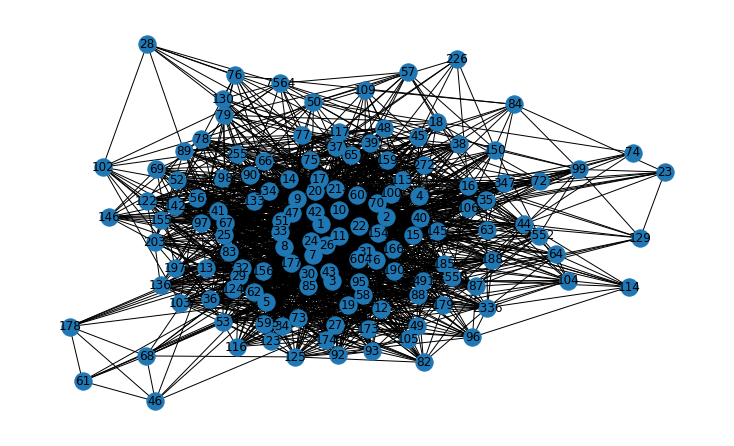

In [43]:
G_top = G.subgraph(m)
pos = nx.spring_layout(G_top)
plt.figure(figsize=(10,6))
nx.draw(G_top, pos,with_labels = True)
plt.show()

#### Qlique

In [44]:
from networkx.algorithms.approximation import clique
cliques = nx.enumerate_all_cliques(G_top)

count=0
cliques_ril = []
for item in cliques:
  count += 1
  if len(item) > 3:
    cliques_ril.append(item)

print(cliques_ril)
print(count)

[[1, 2, 4, 9], [1, 2, 4, 10], [1, 2, 4, 11], [1, 2, 4, 17], [1, 2, 4, 22], [1, 2, 4, 35], [1, 2, 4, 37], [1, 2, 4, 38], [1, 2, 4, 67], [1, 2, 4, 95], [1, 2, 4, 113], [1, 2, 4, 117], [1, 2, 4, 7603], [1, 2, 9, 11], [1, 2, 9, 15], [1, 2, 9, 17], [1, 2, 9, 20], [1, 2, 9, 22], [1, 2, 9, 30], [1, 2, 9, 35], [1, 2, 9, 37], [1, 2, 9, 38], [1, 2, 9, 42], [1, 2, 9, 67], [1, 2, 9, 75], [1, 2, 9, 113], [1, 2, 9, 146], [1, 2, 9, 7603], [1, 2, 10, 11], [1, 2, 10, 15], [1, 2, 10, 17], [1, 2, 10, 22], [1, 2, 10, 37], [1, 2, 10, 42], [1, 2, 10, 44], [1, 2, 10, 58], [1, 2, 10, 67], [1, 2, 10, 75], [1, 2, 10, 89], [1, 2, 10, 113], [1, 2, 10, 117], [1, 2, 10, 146], [1, 2, 10, 179], [1, 2, 11, 15], [1, 2, 11, 17], [1, 2, 11, 18], [1, 2, 11, 20], [1, 2, 11, 22], [1, 2, 11, 30], [1, 2, 11, 42], [1, 2, 11, 58], [1, 2, 11, 87], [1, 2, 11, 90], [1, 2, 11, 95], [1, 2, 11, 96], [1, 2, 11, 7603], [1, 2, 15, 17], [1, 2, 15, 20], [1, 2, 15, 22], [1, 2, 15, 35], [1, 2, 15, 37], [1, 2, 15, 58], [1, 2, 15, 67], [1, 2,

Found 24 cliques with length 10
Clique to appear:  [11, 2, 272, 9, 17, 20, 15, 22, 7603, 47]
Clique to appear:  [11, 2, 17, 9, 22, 7603, 51, 21, 70, 39]
Clique to appear:  [11, 2, 17, 9, 22, 7603, 51, 14, 47, 15]
Clique to appear:  [11, 2, 17, 9, 22, 7603, 20, 15, 14, 47]
Clique to appear:  [11, 2, 17, 9, 22, 31, 14, 15, 20, 47]
Clique to appear:  [11, 2, 24, 15, 22, 9, 47, 14, 51, 7603]
Clique to appear:  [11, 2, 30, 42, 145, 43, 7, 58, 19, 95]
Clique to appear:  [11, 2, 30, 42, 3, 43, 7, 19, 58, 173]
Clique to appear:  [11, 2, 30, 42, 3, 43, 7, 19, 58, 95]
Clique to appear:  [11, 2, 30, 42, 3, 31, 7, 95, 58, 19]
Clique to appear:  [11, 6, 177, 3, 32, 24, 36, 8, 124, 95]
Clique to appear:  [11, 6, 177, 3, 32, 24, 29, 8, 124, 95]
Clique to appear:  [11, 6, 177, 3, 32, 124, 8, 30, 36, 95]
Clique to appear:  [11, 6, 177, 3, 7, 8, 95, 124, 24, 36]
Clique to appear:  [11, 6, 177, 3, 7, 8, 95, 124, 24, 29]
Clique to appear:  [11, 6, 177, 3, 7, 8, 95, 124, 30, 36]
Clique to appear:  [11, 6, 

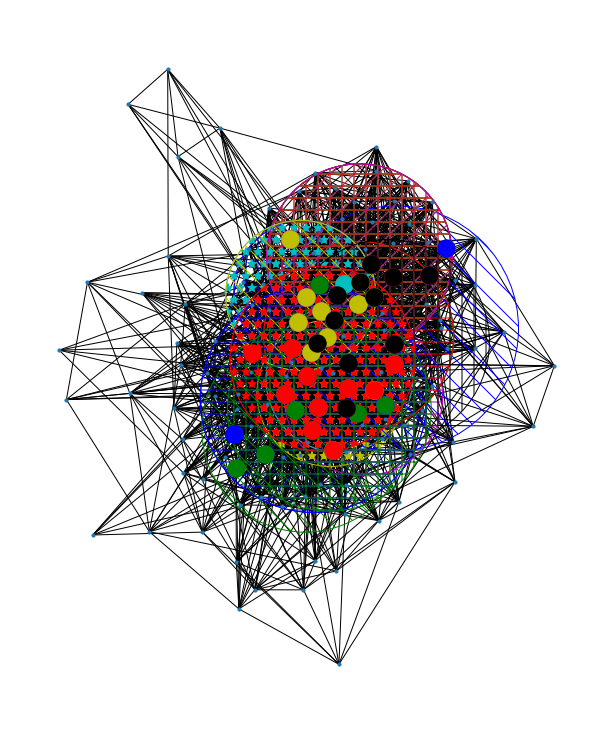

In [45]:
global colors, hatches
colors=it.cycle('bgrcmyk')# blue, green, red, ...
hatches=it.cycle('/\|-+*')

# remember the coordinates of the vertices
coords=nx.spring_layout(G_top)

cliques = nx.find_cliques(G_top)
max_cliques_len = max([len(c) for c in cliques])
# remove "len(clique)>2" if you're interested in maxcliques with 2 edges
cliques=[clique for clique in nx.find_cliques(G_top) if len(clique) == max_cliques_len]
print(f"Found {len(cliques)} cliques with length {max_cliques_len}")
#draw the graph
#nx.draw(G_top,pos=coords)
draw_graph(G_top, pos = coords, show = False)
for clique in cliques:
  print("Clique to appear: ",clique)
  nx.draw_networkx_nodes(G_top,pos=coords,nodelist=clique,node_color=draw_circle_around_clique(clique,coords))

plt.show()

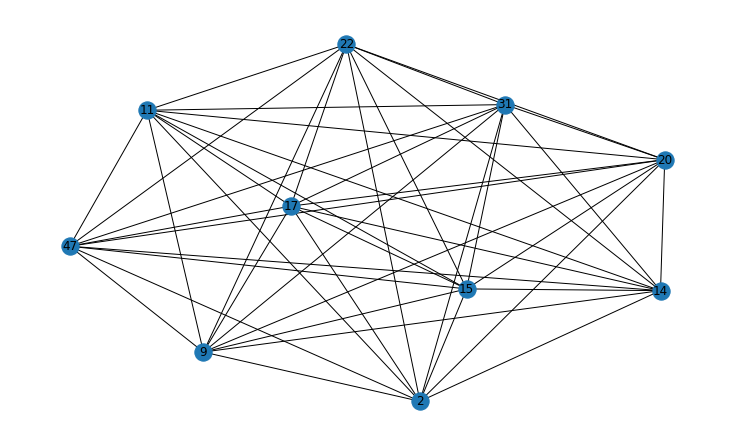

In [48]:
H = G.subgraph(cliques[4])
pos = nx.spring_layout(H)
plt.figure(figsize=(10,6))
nx.draw(H, pos,with_labels = True)
plt.show()

### Ego network

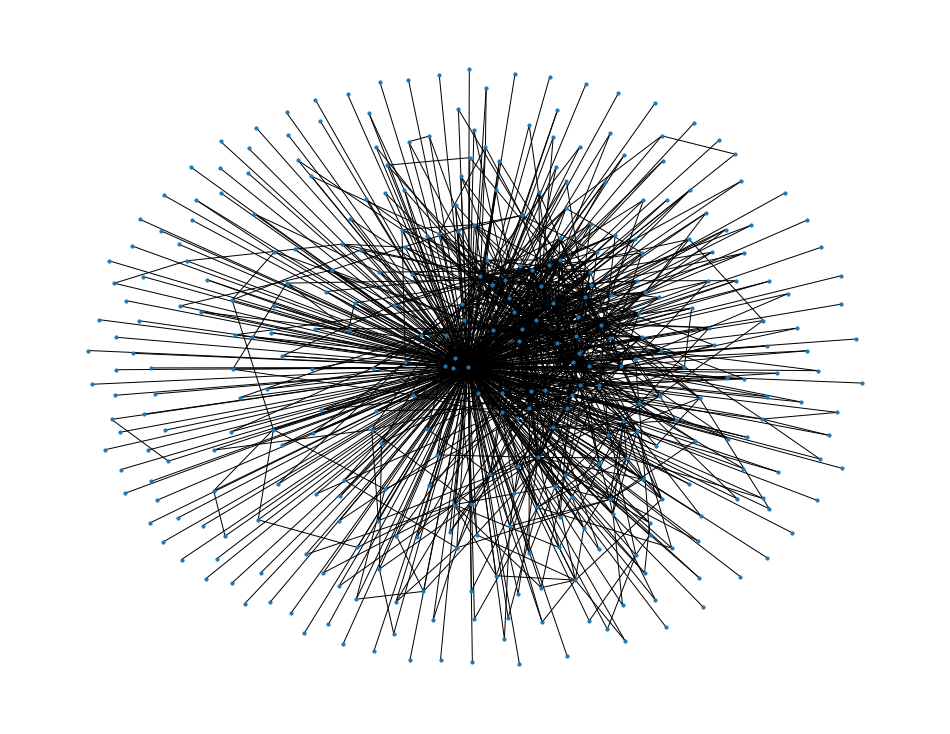

In [52]:
ego_network = nx.ego_graph(G, m[0])
pos = nx.spring_layout(H)
draw_graph(ego_network,pos)

# ANALYSIS ORIENTED GRAPH

In [ ]:
H = nx.from_pandas_edgelist(df,'SOURCE', 'TARGET','DISTANCE', create_using=nx.DiGraph())
#draw_graph(H)

# STUDY OF BEST SELLER

In [ ]:
seller = df["TARGET"].unique()
transaction_ = H.in_degree(nbunch=seller)
transaction_sort = sorted(dict(transaction_).items(),key= lambda item: item[1], reverse=True)

In [ ]:
best_seller = []
number_transaction = []

for i in range(0,10):
  best_seller.append(list(transaction_sort)[i][0])
  number_transaction.append(list(transaction_sort)[i][1])

my_cmap = plt.get_cmap('seismic')
plt.bar(list(map(str,best_seller)), number_transaction, color=my_cmap(number_transaction))
plt.title("SELLER WITH MORE SALES")
plt.xlabel("ID SELLER")
plt.ylabel("NUMBER TRANSACTION")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
plt.show()

In [ ]:
buyer = df["TARGET"].unique()
transaction = H.out_degree(nbunch=seller)
transaction_sort = sorted(dict(transaction).items(),key= lambda item: item[1], reverse=True)

In [ ]:
buyer = []
number_transaction = []

for i in range(0,10):
  buyer.append(list(transaction_sort)[i][0])
  number_transaction.append(list(transaction_sort)[i][1])

my_cmap = plt.get_cmap("PiYG")
plt.bar(list(map(str,buyer)), number_transaction, color=my_cmap(number_transaction))
plt.title("ACTIVE BUYERS")
plt.xlabel("ID SELLER")
plt.ylabel("NUMBER TRANSACTION")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
plt.show()

In [ ]:
dff = df.groupby(["TARGET"]).mean().reset_index()
y = [dff.loc[dff["TARGET"] == i,["RATING"]]["RATING"].iloc[0] for i in best_seller]
my_cmap = plt.get_cmap('PuOr')
plt.bar(list(map(str,best_seller)), y, color=my_cmap(y))
plt.title("MEAN RATING FOR BEST ACTIVE SELLER")
plt.xlabel("ID SELLER")
plt.ylabel("MEAN RATING")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
plt.show()

In [ ]:
#media delle vendite pesate 
import numpy as np
vendite = list(dict(transaction_).values())
mean = np.average(vendite, weights=vendite)

In [ ]:
id_active = list(filter(lambda x: transaction_[x] > mean, dict(transaction_)))
df1 = df[df["TARGET"].isin(id_active)]
df2 = df1.groupby(["TARGET"]).mean().reset_index().sort_values(by="RATING", ascending = False)[["TARGET","RATING"]]
df2["TARGET"] = df2["TARGET"].astype(str)

In [ ]:
import plotly.express as px

fig = px.bar(pd.concat([df2[:5],df2[-5:]]), x='TARGET', y='RATING', title="MOST and LESS RELAIBLE SELLERS")
fig.add_hline(y=0)
fig.add_vline(x=4.5)
#fig.ylim([-10,10])

fig.show()

In [ ]:
ids = df2["TARGET"].unique()
id1 = ids[:5]
id2 = ids[-5:]
id = np.concatenate((id1,id2))
value = []
for i in id:
  value.append(df.loc[df["TARGET"] == int(i), "RATING"].count())

plt.bar(id,value)
plt.show()
print(value)

# DEGREE CENTRALITY IN/OUT DIRECTED GRAPH

In [ ]:
degree_in = nx.in_degree_centrality(H) # grado
#pos = nx.spiral_layout(H)
#plt.figure(figsize=(20,12))
#draw(H, pos, degree_in, 'IN DEGREE CENTRALITY DIRECTED GRAPH')

In [ ]:
ten_in = []
ten_value = []
dict_sort = sorted(degree_in.items(),key= lambda item: item[1], reverse=True)
print("Top ten ID-User more active on the site (closeness_centrality) :")
for i in range(0,10):
  print(f"ID :  {dict_sort[i][0]}      VALUES DEGREE : {dict_sort[i][1]}")
  ten_in.append(dict_sort[i][0])
  ten_value.append(dict_sort[i][1])

In [ ]:
degree_out = nx.out_degree_centrality(H) 
#pos = nx.spiral_layout(H)
#plt.figure(figsize=(20,12))
#draw(G, pos, degree_out, 'OUT DEGREE CENTRALITY DIRECTED GRAPH')

In [ ]:
ten_out = []
ten_value = []
dict_sort = sorted(degree_out.items(),key= lambda item: item[1], reverse=True)
print("Top ten BEST SELLER :")
for i in range(0,10):
  print(f"ID : {dict_sort[i][0]}",f"VALUES DEGREE : {dict_sort[i][1]}", sep="\t")
  ten_out.append(dict_sort[i][0])
  ten_value.append(dict_sort[i][1])

In [ ]:
pagerank = nx.pagerank(H)
#draw(H, pos, pagerank, "Page Rank")

In [ ]:
draw(H, None, nx.closeness_centrality(H), "Closeness Centrality")

In [ ]:
draw(H, None, nx.betweenness_centrality(H), "Betweenness Centrality")